### Raster Algorithms
In previous lab, we have looked at band math and calculated NDVI for Landsat-8 imagery using red and near infrared bands. In this lab, we walk you through a few raster data algorithms. Some of these algorithms can be applied not only to geospatial raster data but any type of image data.

Before we start with any of the raster algorithms, let's recalculate the NDVI from red and near infrared bands.

Note: We are processing the downsampled bands you created in a prior lab, Transforms.

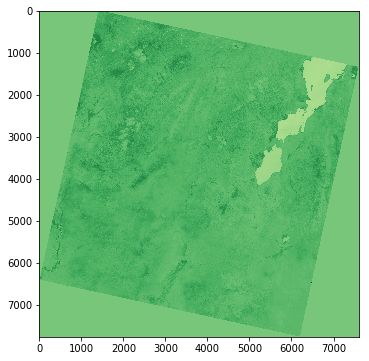

In [1]:
import rasterio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt

%matplotlib inline


with rasterio.open('C:/Users/mac/Documents/Python_Rasterio/LC08_L1TP_169056_20190312_20190325_01_T1_B4.TIF') as band1:
    red_band = band1.read()

with rasterio.open('C:/Users/mac/Documents/Python_Rasterio/LC08_L1TP_169056_20190312_20190325_01_T1_B5.TIF') as band2:
       nir_band = band2.read()

nir_band = nir_band.astype(np.float64)
red_band = red_band.astype(np.float64)
ndvi = (nir_band - red_band)/(nir_band + red_band+0.0000000001) # +0.0000000001 is to avoid 0/0
        
fig = plt.figure(figsize=(6,6))
rasterio.plot.show(ndvi, cmap ='YlGn')

### Thresholding
The simple thresholding is a method that replaces each pixel in an image with a black pixel if the pixel value is is less than some fixed constant T or a white pixel if the image intensity is greater than that constant.

So, we can threshold the NDVI to obtain areas with live green vegetation.

From previous section, we know that areas containing a dense vegetation will tend to have positive values (say 0.3 to 0.8). To isolate the areas contaning vegetation from others, we threshold the NDVI index i.e. we set a pixel with NDVI value >=0.3 to 1 and < 0.3 to 0 i.e. T=0.3.

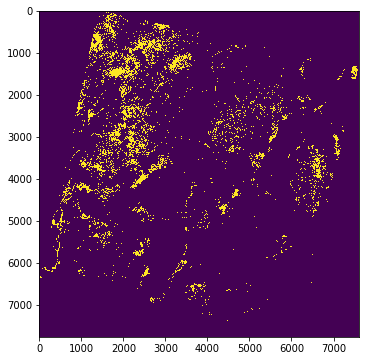

In [2]:
ndvi[np.where(ndvi>=0.3)] = 1
ndvi[np.where(ndvi<0.3)] = 0
fig = plt.figure(figsize = (6,6))
rasterio.plot.show(ndvi)


In the above image, we have set the pixels with NDVI value >=0.3 to 1 and < 0.3 to 0. It can be observed that the western part of the area acomodates most of the green vegetation. Apart from that, there are a few little islands of pixels that also contain some vegetation.


### Median Filtering
The median filtering is a digital image processing technique, often used to remove noise from an image. Such noise reduction is a typical pre-processing step to improve the results of later processing.

The main idea of the median filter is to run through the image from pixel to pixel and replace its value with the median of neighboring pixels.

Lets consider the below raster.

<table border=1>

50 50 50 50 50
50 50 50 50 50
50 100 50 50 50
50 50 50 50 50
50 50 50 50 50 </table>

Note that, every pixel has a value of 50, except one pixel which has a value of 100.

A neighborhood is a set of pixels surrounding a pixels. Every pixel in the 3×3 matrix with highlighted borders is a neighbor of the center pixel. Here the center pixel is the pixel with the value 100.

</table>
In median filtering, we sort the values of the highlighted 3×3 matrix i.e.

50	50	50	50	50
50	50	50	50	50
50	100	50	50	50
50	50	50	50	50
50	50	50	50	50
</table> Original values: 50,50,50,50,100,50,50,50,50
sorted values : 50,50,50,50,50,50,50,50,100

Median: 50
The value of the central pixel is replace with the median value of its neighbors. So the 100 is replaced with 50.

<table border=1>

</table>
In our case, we have few isolated pixels with high NDVI value, surrounded by background (pixels with low NDVI value). So, to get rid of the isolated pixels, median filtering is performed below with a window or matrix of size (7×7).

We will leverage code already created for this operation, namely the median filter from SciPy - Signal Processing.

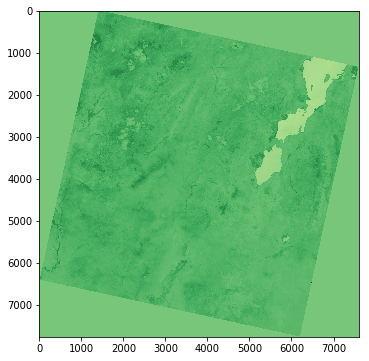

In [3]:
# See : https://docs.scipy.org/doc/scipy/reference/signal.html
from scipy.signal import medfilt
%matplotlib inline

red_band = medfilt(red_band, (1,7,7))
nir_band = medfilt(nir_band, (1,7,7))

nir_band = nir_band.astype(np.float64)
red_band = red_band.astype(np.float64)
ndvi = (nir_band - red_band)/(nir_band + red_band+0.0000000001)

fig = plt.figure(figsize=(6,6))
rasterio.plot.show(ndvi, cmap ='YlGn')

###### Let's threshold the obtained image to find major vegetative areas.

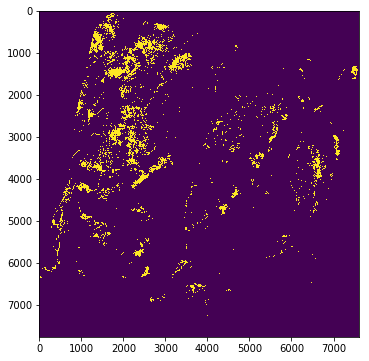

In [4]:
ndvi[np.where(ndvi>=0.3)] = 1
ndvi[np.where(ndvi<0.3)] = 0
fig = plt.figure(figsize = (6,6))
rasterio.plot.show(ndvi)

Comparing the above image with the one obtained previously shows that there are very few isolated foreground (pixels with high ndvi value). You can change the window size from (1,7,7) to (1,11,11) or (1,21,21) or (1,3,3) in

In [ ]:
red_band = medfilt(red_band, (1,7,7))
nir_band = medfilt(nir_band, (1,7,7))

###### and observe the different thresholding results.